# Assigment 3 Analyzing Time Series seansonality, trend and noise

In [49]:
import pandas as pd

In [50]:
import statsmodels.api as sm

In [51]:
import matplotlib.pyplot as plt

In [52]:
from statsmodels.graphics import tsaplots

In [53]:
from pylab import rcParams

In [54]:
path_name = 'C:/Users/JUANES_PC/Desktop/EFL/BAS250AnalyticalTools/'

In [55]:
female = pd.read_csv(path_name + 'daily_total_female_births.csv')

In [56]:
temp = pd.read_csv(path_name + 'daily_min_temperatures.csv')

## Female Births Dataset

In [57]:
female.head(n=10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [58]:
female.dtypes

Date      object
Births     int64
dtype: object

In [59]:
female.shape

(365, 2)

In [24]:
female.isnull().sum()

Date      0
Births    0
dtype: int64

female['Date']=pd.to_datetime(female['Date'])

female.dtypes

female.set_index('Date')

In [65]:
female.index=pd.DatetimeIndex(freq='w', start=0, periods=365)

C:\Users\JUANES_PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


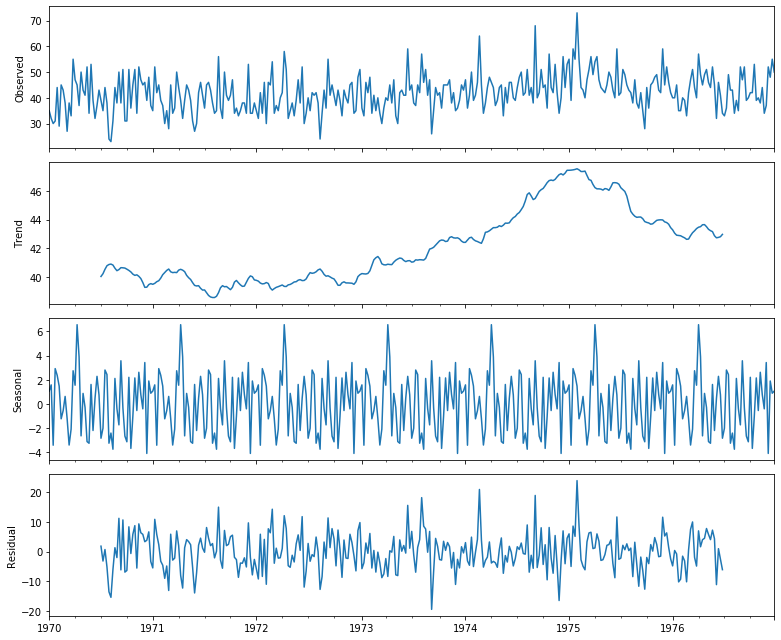

In [80]:
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(female['Births'])
fig = decomposition.plot()
plt.show()

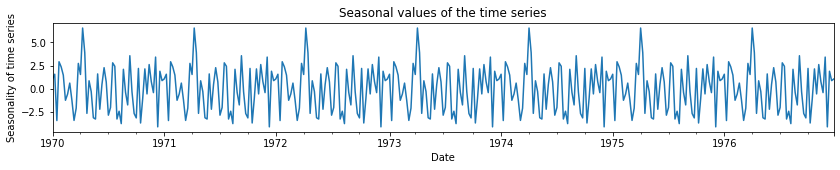

In [81]:
decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')
plt.show()

#### According to the seasonal values of female biths, it has a same behavior along the years. We can see that the peak of biths is always in the first quarter of every year, meaning that around the months of march and april are the months with more births.

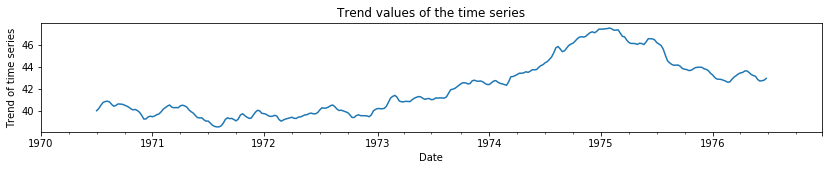

In [82]:
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

### Analyzing the trend of the births, we can observed that it is going to be an increase in middle od the 70's, how ever this trend decrease at the end of the 70's, it  seems to remain contant after this. However, the number are going to remain higher than the begining. 

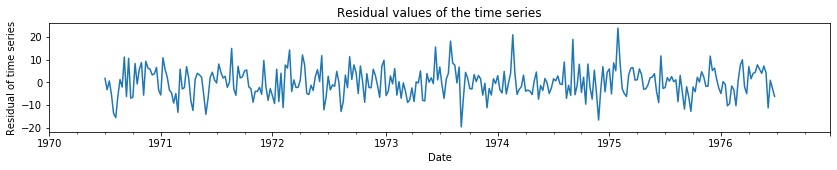

In [83]:
decomp_resid = decomposition.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

### According to this graph we can conclude that this time series seems like white noise due to the values are around zero. This means that the variables are independent.

## Temperature dataset

In [72]:
temp.head(n=10)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [73]:
temp.dtypes

Date     object
Temp    float64
dtype: object

In [74]:
temp.shape

(3650, 2)

In [75]:
temp.isnull().sum()

Date    0
Temp    0
dtype: int64

In [76]:
temp.index=pd.DatetimeIndex(freq='w', start=0, periods=3650)

C:\Users\JUANES_PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


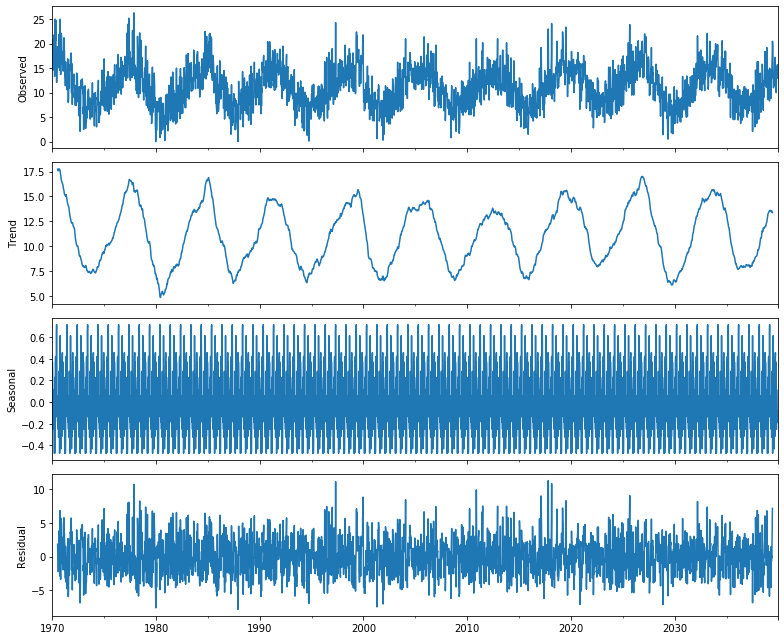

In [84]:
rcParams['figure.figsize'] = 11, 9
decomposition2 = sm.tsa.seasonal_decompose(temp['Temp'])
fig = decomposition2.plot()
plt.show()

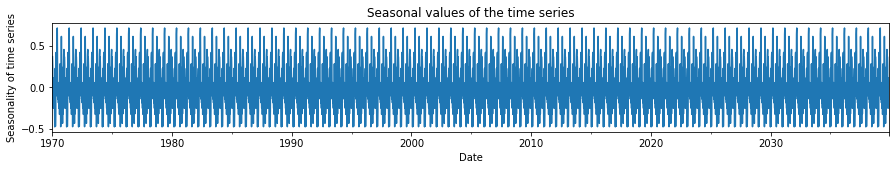

In [89]:
decomp_seasonal = decomposition2.seasonal
ax = decomp_seasonal.plot(figsize=(15, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')
plt.show()

### Observing the seasonal values the data behaves cyclic as it should be considering the year's seasons.

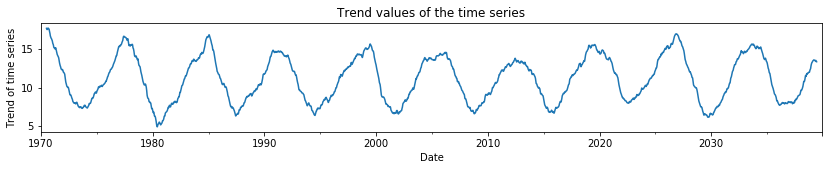

In [90]:
decomp_trend = decomposition2.trend
ax = decomp_trend.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

### The trend values shows the cyclicity of the data as is expected with the temperature.

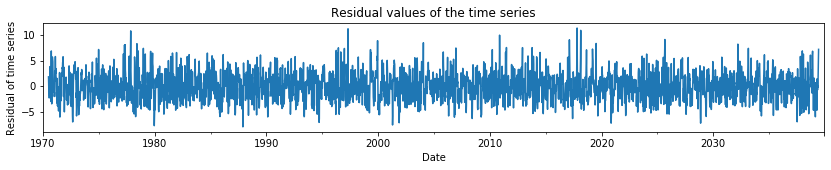

In [91]:
decomp_resid = decomposition2.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

### The graphic shows that this is a white noise time series dataset according to the distrbution around zero of the values.